# Bar charts with monthly and annual grouping

#### Install and import the necessary libraries.

In [1]:
!pip install pandas matplotlib numpy hydrostats

In [2]:
!pip install openpyxl

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import hydrostats.data as hd
import matplotlib as mpl

In [30]:
file_path = '../Data/evapotranspiracao.xlsx'  # Replace 'YOUR_FILE.xlsx' 

In [28]:
# Load the file
datat = pd.read_excel(file_path, sheet_name='Todas_bacias', engine='openpyxl')
datat.set_index('Data', inplace=True) 
print("File found and loaded.")
#
datat.info()
datat.head()

File found and loaded.
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6209 entries, 2003-01-01 to 2019-12-31
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Eta_2115_MOD           6209 non-null   float64
 1   Eta_2115_SSEBop        6209 non-null   float64
 2   Eta_404_MOD            6209 non-null   float64
 3   Eta_404_SSEBop         6209 non-null   float64
 4   Eta_2115_MOD_dp        6209 non-null   float64
 5   Eta_2115_SSEBop_dp     6209 non-null   float64
 6   Eta_404_MOD_dp         6209 non-null   float64
 7   Eta_404_SSEBop_dp      6209 non-null   float64
 8   Eta_2115_MOD_mdian     6209 non-null   float64
 9   Eta_2115_SSEBop_mdian  6209 non-null   float64
 10  Eta_404_MOD_mdian      6209 non-null   float64
 11  Eta_404_SSEBop_mdian   6209 non-null   float64
dtypes: float64(12)
memory usage: 630.6 KB


,Eta_2115_MOD,Eta_2115_SSEBop,Eta_404_MOD,Eta_404_SSEBop,Eta_2115_MOD_dp,Eta_2115_SSEBop_dp,Eta_404_MOD_dp,Eta_404_SSEBop_dp,Eta_2115_MOD_mdian,Eta_2115_SSEBop_mdian,Eta_404_MOD_mdian,Eta_404_SSEBop_mdian
Data,,,,,,,,,,,,
2003-01-01,5.217688,4.0158,5.134813,4.129032,0.706263,0.488735,0.575963,0.483766,5.18185,3.967742,5.1571,4.096774
2003-01-02,5.217688,4.0158,5.134813,4.129032,0.706263,0.488735,0.575963,0.483766,5.18185,3.967742,5.1571,4.096774
2003-01-03,5.217688,4.0158,5.134813,4.129032,0.706263,0.488735,0.575963,0.483766,5.18185,3.967742,5.1571,4.096774
2003-01-04,5.217688,4.0158,5.134813,4.129032,0.706263,0.488735,0.575963,0.483766,5.18185,3.967742,5.1571,4.096774
2003-01-05,5.217688,4.0158,5.134813,4.129032,0.706263,0.488735,0.575963,0.483766,5.18185,3.967742,5.1571,4.096774


##### ---- Grouping annual and monthly series

In [31]:
def year_total(datat): # function to calculate annual totals
    b = datat.groupby(datat.index.year)
    return b.sum()
totalannual = year_total(datat)
#
def monthly_total(datat): # function to calculate monthly totals
    a = datat.groupby(datat.index.strftime("%m"))
    return a.sum()
totalmonths = monthly_total(datat)

In [37]:
# Support calculations
totalannual = year_total(datat)
type_total = 'annual' # Choose the type of graph you want to produce: annual or monthly
print("Type of chart chosen:", type_total)

Type of chart chosen: annual


In [39]:
# If you chose to make an annual chart or a monthly chart
if type_total == 'annual':
    xdatat = totalannual.index.tolist()
    num_years = totalannual.shape[0]  # to know the number of years (lines)
    print("Number of years:", num_years)
    total = totalannual  #for annual totals   
else:
    xdatat = ['jan.','fev.','mar.','abr.','maio','jun.','jul.','ago.','set.','out.','nov.','dez.']
    total = totalmonths/num_years  #for annual totals
#""" Select the columns corresponding to the desired products
ymediamodcol=total.iloc[:,2].values  #variable for mean
desvpadmodcol=total.iloc[:,6].values  #variable for standard deviation
ymediassebopcol = total.iloc[:,3].values #variable for mean
desvpadssebopcol=total.iloc[:,7].values #variable for standard deviation
#
ymedianamodcol = total.iloc[:,10].values #variable for median
ymedianassebopol=total.iloc[:,11].values #variable for median

Number of years: 17


#### Building the graph

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


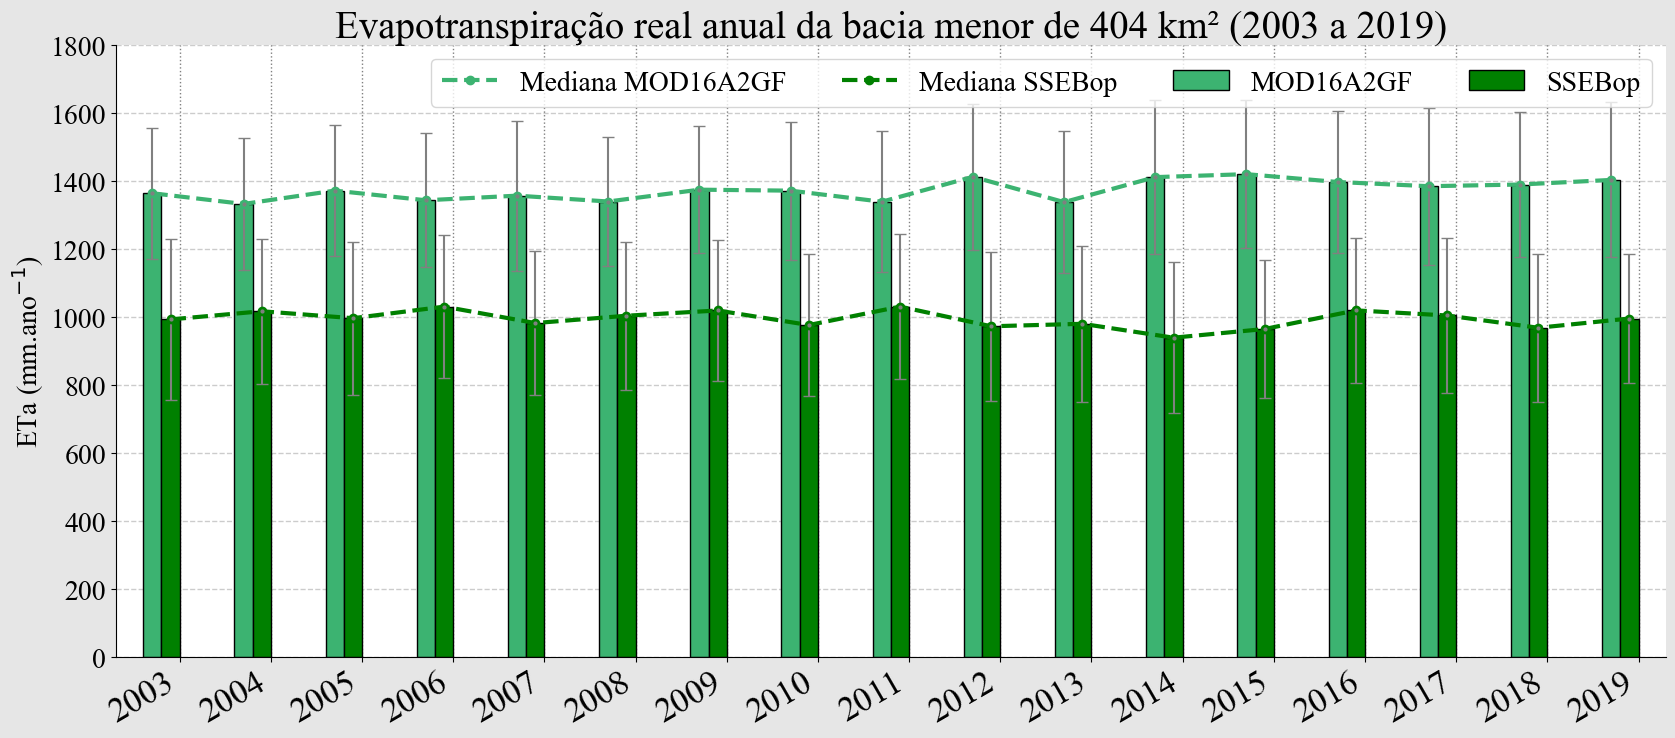

In [42]:
# define figure
fig, ax = plt.subplots(1, figsize=(20, 9))
# numerical x
x = np.arange(0, len(xdatat))
print(x)
#
# Plot bars and error bars
plt.bar(x - 0.1, ymediamodcol, width = 0.2, color = '#3CB371')
plt.bar(x + 0.1, ymediassebopcol, width = 0.2, color = '#008000')
plt.errorbar(x - 0.1, ymediamodcol, yerr = desvpadmodcol, fmt = 'o',color = 'gray', markersize=2, capsize = 4)
plt.errorbar(x + 0.1, ymediassebopcol, yerr = desvpadssebopcol, fmt = 'o',color = 'gray', markersize=2, capsize = 4)
#Plot median lines
plt.plot(x - 0.1, ymediamodcol, color='#3CB371', marker='o', linestyle='--', linewidth=3)
plt.plot(x + 0.1, ymediassebopcol, color='#008000', marker='o', linestyle='--', linewidth=3)
#
# remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#
# x y details
# If you chose to make an annual chart or a monthly chart
if type_total == 'annual':
    plt.ylabel('ETa (mm.ano$^{-1}$)')
    plt.xlim(-0.5, 16.5)
    plt.ylim(0, 1800)
    plt.title('Evapotranspiração real anual da bacia menor de 404 km² (2003 a 2019)', loc ='center', fontsize=28)
else:
    plt.ylabel('ETa (mm.mês$^{-1}$)', fontsize=25)
    plt.xlim(-0.5, 11.5)
    plt.ylim(0, 180)
    plt.title('Evapotranspiração real mensal da bacia maior de 2115 km² (2003 a 2019)', loc ='center', fontsize=28)
#    
plt.grid(color='grey', linestyle='dotted', linewidth=1)
#plt.xticks(x, dadosf.x, fontsize=20)
#plt.xticks(x+0.5, xdatat, fontsize = 30, rotation=0)
plt.xticks(x+0.2, xdatat, fontsize = 25)
plt.gcf().autofmt_xdate()
#
# grid lines and define legend
ax.set_axisbelow(True)
ax.yaxis.grid(color='black', linestyle='dashed', alpha=0.2)
ax.set_facecolor('xkcd:gray')
ax.set_facecolor((1, 1, 1))
plt.rcParams.update({'font.size': 20})
plt.legend(['Mediana MOD16A2GF','Mediana SSEBop','MOD16A2GF','SSEBop'], loc='upper right', ncol =4)
#
plt.show()